In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])


In [4]:
np.random.seed(42)

input_neur = 2
hidden_neur = 4
output_neur = 1

w1 = np.random.randn(input_neur, hidden_neur)
b1 = np.zeros((1, hidden_neur))

w2 = np.random.randn(hidden_neur, output_neur)
b2 = np.zeros((1, output_neur))

In [5]:
learning_rate = 0.1
epochs = 10000

losses = []


In [6]:
for epoch in range(epochs):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, w2) + b2
    y_pred = sigmoid(z2)

    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)

    error_output = y_pred - y
    d_output = error_output * sigmoid_derivative(y_pred)

    error_hidden = np.dot(d_output, w2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    w2 -= learning_rate * np.dot(a1.T, d_output)
    b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

    w1 -= learning_rate * np.dot(X.T, d_hidden)
    b1 -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

Final Predictions:
[[0.03730284]
 [0.9491398 ]
 [0.94480964]
 [0.06425255]]


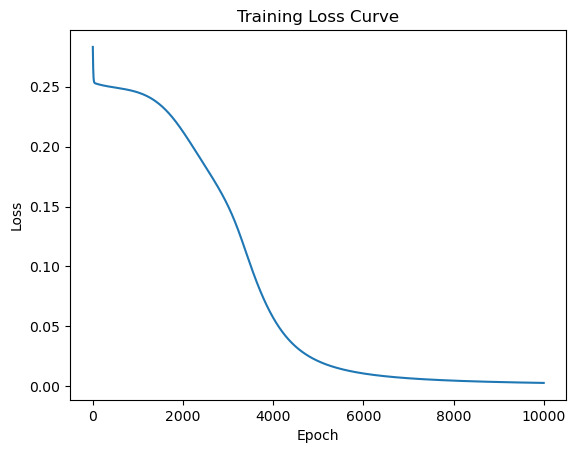

In [7]:
print("Final Predictions:")
print(y_pred)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()